# Neural Network Approximations
How Practical is the Universal Approximation Theorem?
<br>
<br>
Code for an article on the practical constriants of the universal approximation theorem. The article can be found *here*.

In [14]:
#imports
import numpy as np
import pandas as pd

import random
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print(tf.__version__)

2.1.0


## Function 1: 
y = x^2 + x - 4      
-10 <= x<= 10

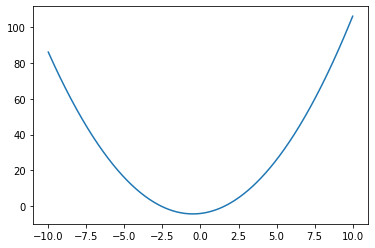

In [64]:
#Create data 
n_points = 10000

x = np.linspace(-10,10,n_points) #Create 1000 data points between -10 and 10
y = x**2 + x - 4

plt.plot(x, y) 

In [65]:
feat_x = tf.feature_column.numeric_column('x')
dnn_model = tf.estimator.DNNRegressor(hidden_units=[10],
                                      feature_columns=[feat_x],
                                     activation_fn=<) 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmpcijpbvbd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [63]:
input_func = tf.compat.v1.estimator.inputs.numpy_input_fn(x={'x': x}, y=y, batch_size=100, num_epochs=1,shuffle=True)

#input_func = tf.compat.v1.estimator.inputs. pandas_input_fn(x=x,y=y,batch_size=100,num_epochs=1,shuffle=True)
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmpx8uj9a_a/model.ckpt-5100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5100 into /var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmpx8uj9a_a/model.ckpt.
INFO:tensorflow:loss = 2486.31

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmpx8uj9a_a/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


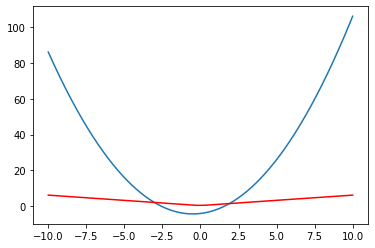

In [49]:
eval_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={'x': x}, 
    y=y, 
    batch_size=100, 
    num_epochs=1,
    shuffle=False)

predictions = []
for p in dnn_model.predict(input_fn=eval_input_func):
    predictions.append(p['predictions'])

plt.plot(x, y) 
plt.plot(x, predictions,'r') 